In [1]:
import numpy as np
import pandas as pd

data_path = '../input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

# 1.EDA
## 1.1 데이터 둘러보기

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 1.2 효과적인 분석을 위한 피처 엔지니어링
### 1.2.1 연, 월, 일, 시, 분, 초 분리

In [8]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

### 1.2.2 요일 feature 추가

In [9]:
from datetime import datetime
import calendar

train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()]
)

### 1.2.3 계절 정수->문자열

In [10]:
train['season'] = train['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
})

train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog',
})

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 1.2.4 시각화
#### 1.2.4.1 타깃값

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

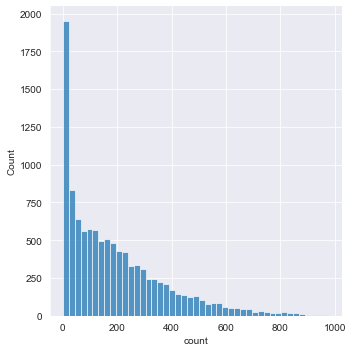

In [18]:
sns.displot(train['count'])

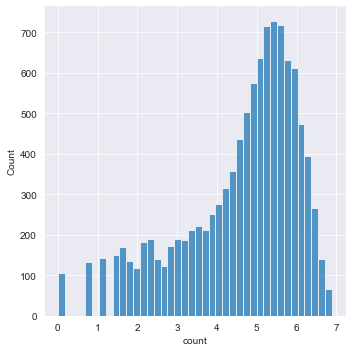

In [20]:
sns.displot(np.log(train['count']))

log(count)를 예측하는 편이 더 정확해보인다.

#### 1.2.4.2 연, 월, 일, 시, 분, 초

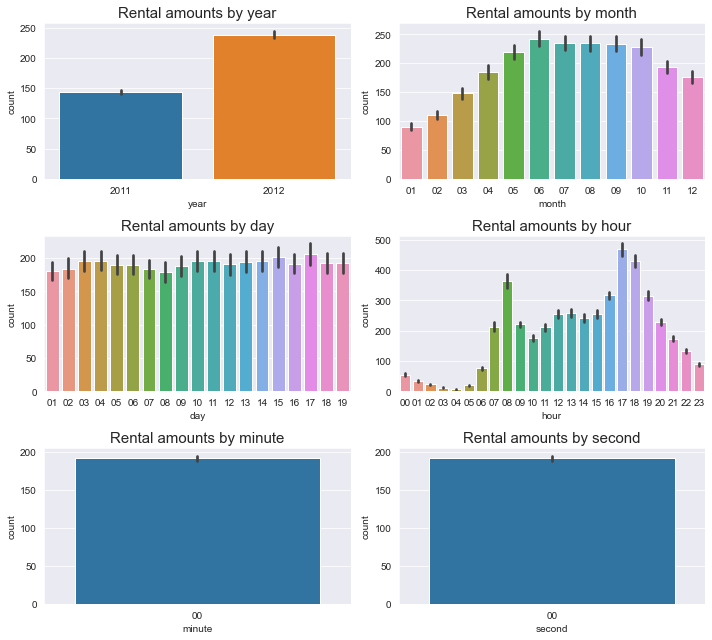

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(10, 9))

sns.barplot(x='year', y='count', data=train, ax=ax[0, 0])
sns.barplot(x='month', y='count', data=train, ax=ax[0, 1])
sns.barplot(x='day', y='count', data=train, ax=ax[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=ax[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=ax[2, 0])
sns.barplot(x='second', y='count', data=train, ax=ax[2, 1])

ax[0, 0].set_title('Rental amounts by year')
ax[0, 1].set_title('Rental amounts by month')
ax[1, 0].set_title('Rental amounts by day')
ax[1, 1].set_title('Rental amounts by hour')
ax[2, 0].set_title('Rental amounts by minute')
ax[2, 1].set_title('Rental amounts by second')

plt.tight_layout()

#### 1.2.4.3 계절, 날씨, 공휴일, 근무일

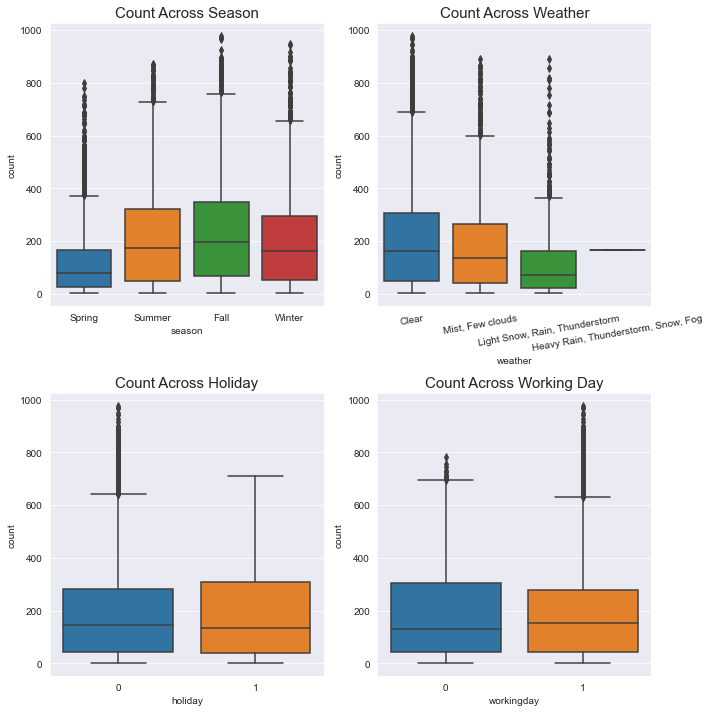

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='season', y='count', data=train, ax=ax[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=ax[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=ax[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=ax[1, 1])

ax[0, 0].set_title('Count Across Season')
ax[0, 1].set_title('Count Across Weather')
ax[1, 0].set_title('Count Across Holiday')
ax[1, 1].set_title('Count Across Working Day')

ax[0, 1].tick_params(axis='x', labelrotation=10)

plt.tight_layout()

#### 1.2.4.4 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량

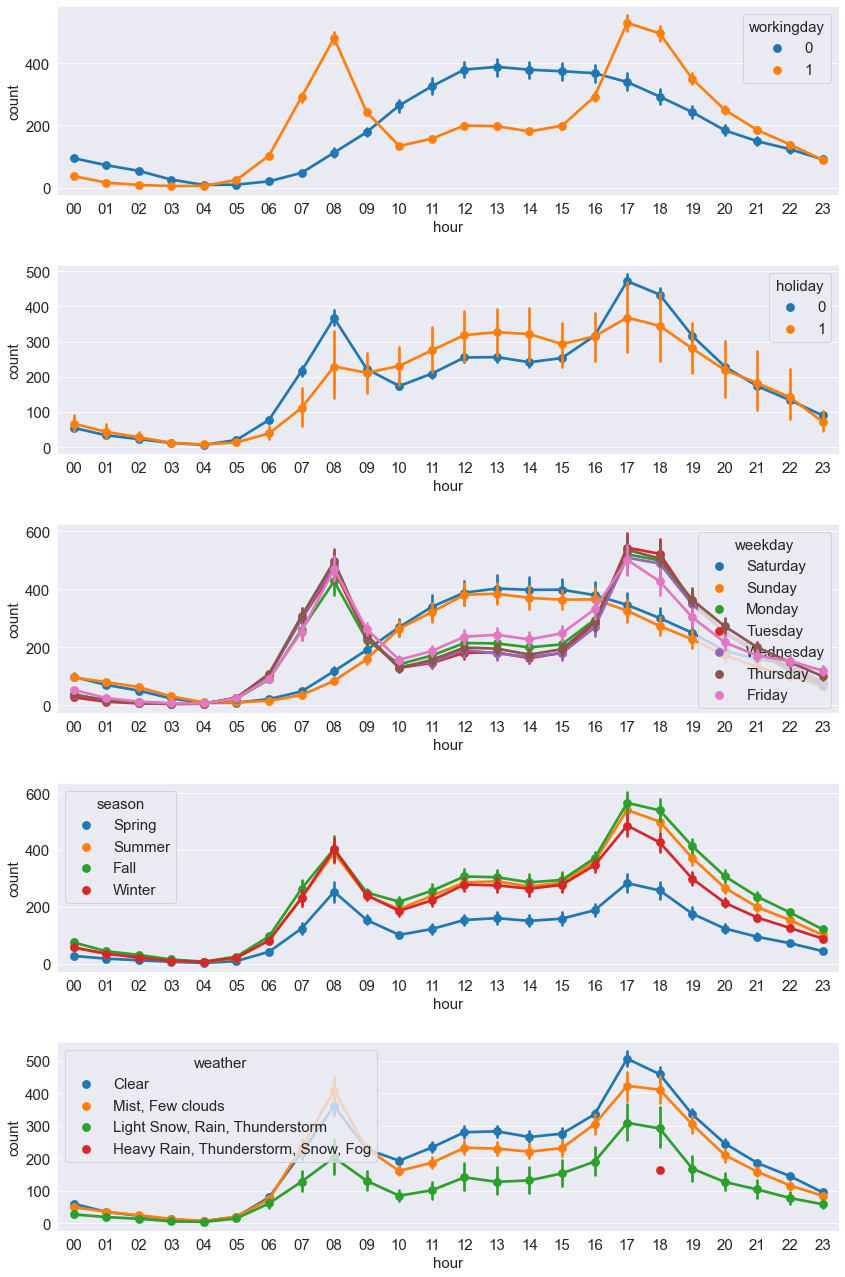

In [41]:
mpl.rc('font', size=15)
fig, ax = plt.subplots(5, 1, figsize=(12, 18))

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=ax[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=ax[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=ax[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=ax[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=ax[4])

plt.tight_layout()

#### 1.2.4.5 온도, 체감온도, 풍속, 습도별 대여수량

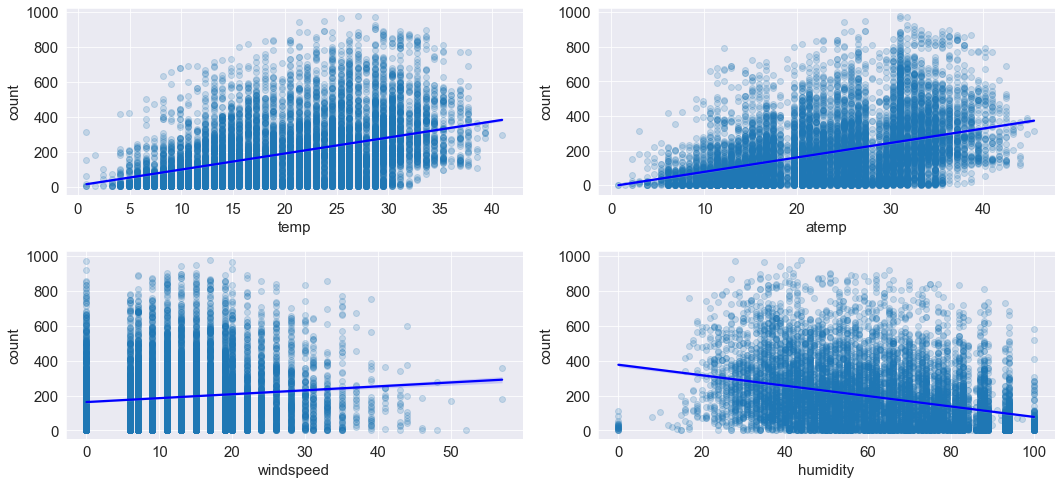

In [51]:
mpl.rc('font', size=15)
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

sns.regplot(x='temp', y='count', data=train, ax=ax[0, 0],
            scatter_kws={'alpha': .2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=ax[0, 1],
            scatter_kws={'alpha': .2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=ax[1, 0],
            scatter_kws={'alpha': .2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=ax[1, 1],
            scatter_kws={'alpha': .2}, line_kws={'color': 'blue'})

plt.tight_layout()

#### 1.2.4.6 interval data correlation

Text(0.5, 1.0, 'Heatmap of Numerical Data')

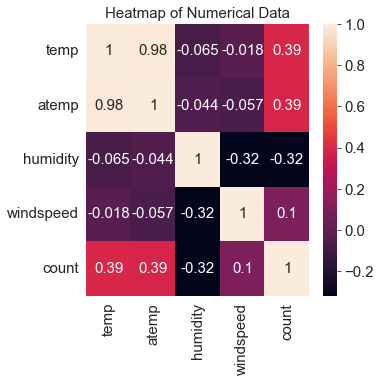

In [53]:
corrMat = train[['temp', 'atemp', 'humidity','windspeed', 'count']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrMat, annot=True)
ax.set_title('Heatmap of Numerical Data')